In [1]:
from imageai import Detection
yolo = Detection.ObjectDetection()
yolo.setModelTypeAsYOLOv3()
yolo.setModelPath("yolo.h5")
yolo.loadModel()
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from string import ascii_lowercase
import os, sys
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.7.0
Num GPUs Available:  1


In [2]:
filepaths = []
labels = []

limiter = 0
path_of_the_directory = 'data/asl_alphabet_train/asl_alphabet_train/'
folders = os.scandir(path_of_the_directory)
print("Directories in '% s':" % path_of_the_directory)
for n in folders :
    limiter = 0
    if n.is_dir() or n.is_file():
        path_of_the_directory_images = 'data/asl_alphabet_train/asl_alphabet_train/' + n.name
        files = os.scandir(path_of_the_directory_images)
        print("Files in '% s':" % path_of_the_directory_images)
        for f in files :
            #limiter = limiter + 1
            if f.is_file() and limiter < 250 :
                print("File = '% s':" % f.name)
                filepaths.append(path_of_the_directory + str(n.name) + "/" + str(f.name))
                labels.append(n.name)        
        files.close()
folders.close()







Directories in 'data/asl_alphabet_train/asl_alphabet_train/':
Files in 'data/asl_alphabet_train/asl_alphabet_train/A':
File = 'A1.jpg':
File = 'A10.jpg':
File = 'A100.jpg':
File = 'A1000.jpg':
File = 'A1001.jpg':
File = 'A1002.jpg':
File = 'A1003.jpg':
File = 'A1004.jpg':
File = 'A1005.jpg':
File = 'A1006.jpg':
File = 'A1007.jpg':
File = 'A1008.jpg':
File = 'A1009.jpg':
File = 'A101.jpg':
File = 'A1010.jpg':
File = 'A1011.jpg':
File = 'A1012.jpg':
File = 'A1013.jpg':
File = 'A1014.jpg':
File = 'A1015.jpg':
File = 'A1016.jpg':
File = 'A1017.jpg':
File = 'A1018.jpg':
File = 'A1019.jpg':
File = 'A102.jpg':
File = 'A1020.jpg':
File = 'A1021.jpg':
File = 'A1022.jpg':
File = 'A1023.jpg':
File = 'A1024.jpg':
File = 'A1025.jpg':
File = 'A1026.jpg':
File = 'A1027.jpg':
File = 'A1028.jpg':
File = 'A1029.jpg':
File = 'A103.jpg':
File = 'A1030.jpg':
File = 'A1031.jpg':
File = 'A1032.jpg':
File = 'A1033.jpg':
File = 'A1034.jpg':
File = 'A1035.jpg':
File = 'A1036.jpg':
File = 'A1037.jpg':
File = 'A1

File = 'B1867.jpg':
File = 'B1868.jpg':
File = 'B1869.jpg':
File = 'B187.jpg':
File = 'B1870.jpg':
File = 'B1871.jpg':
File = 'B1872.jpg':
File = 'B1873.jpg':
File = 'B1874.jpg':
File = 'B1875.jpg':
File = 'B1876.jpg':
File = 'B1877.jpg':
File = 'B1878.jpg':
File = 'B1879.jpg':
File = 'B188.jpg':
File = 'B1880.jpg':
File = 'B1881.jpg':
File = 'B1882.jpg':
File = 'B1883.jpg':
File = 'B1884.jpg':
File = 'B1885.jpg':
File = 'B1886.jpg':
File = 'B1887.jpg':
File = 'B1888.jpg':
File = 'B1889.jpg':
File = 'B189.jpg':
File = 'B1890.jpg':
File = 'B1891.jpg':
File = 'B1892.jpg':
File = 'B1893.jpg':
File = 'B1894.jpg':
File = 'B1895.jpg':
File = 'B1896.jpg':
File = 'B1897.jpg':
File = 'B1898.jpg':
File = 'B1899.jpg':
File = 'B19.jpg':
File = 'B190.jpg':
File = 'B1900.jpg':
File = 'B1901.jpg':
File = 'B1902.jpg':
File = 'B1903.jpg':
File = 'B1904.jpg':
File = 'B1905.jpg':
File = 'B1906.jpg':
File = 'B1907.jpg':
File = 'B1908.jpg':
File = 'B1909.jpg':
File = 'B191.jpg':
File = 'B1910.jpg':
File = 

File = 'C2883.jpg':
File = 'C2884.jpg':
File = 'C2885.jpg':
File = 'C2886.jpg':
File = 'C2887.jpg':
File = 'C2888.jpg':
File = 'C2889.jpg':
File = 'C289.jpg':
File = 'C2890.jpg':
File = 'C2891.jpg':
File = 'C2892.jpg':
File = 'C2893.jpg':
File = 'C2894.jpg':
File = 'C2895.jpg':
File = 'C2896.jpg':
File = 'C2897.jpg':
File = 'C2898.jpg':
File = 'C2899.jpg':
File = 'C29.jpg':
File = 'C290.jpg':
File = 'C2900.jpg':
File = 'C2901.jpg':
File = 'C2902.jpg':
File = 'C2903.jpg':
File = 'C2904.jpg':
File = 'C2905.jpg':
File = 'C2906.jpg':
File = 'C2907.jpg':
File = 'C2908.jpg':
File = 'C2909.jpg':
File = 'C291.jpg':
File = 'C2910.jpg':
File = 'C2911.jpg':
File = 'C2912.jpg':
File = 'C2913.jpg':
File = 'C2914.jpg':
File = 'C2915.jpg':
File = 'C2916.jpg':
File = 'C2917.jpg':
File = 'C2918.jpg':
File = 'C2919.jpg':
File = 'C292.jpg':
File = 'C2920.jpg':
File = 'C2921.jpg':
File = 'C2922.jpg':
File = 'C2923.jpg':
File = 'C2924.jpg':
File = 'C2925.jpg':
File = 'C2926.jpg':
File = 'C2927.jpg':
File =

File = 'del1794.jpg':
File = 'del1795.jpg':
File = 'del1796.jpg':
File = 'del1797.jpg':
File = 'del1798.jpg':
File = 'del1799.jpg':
File = 'del18.jpg':
File = 'del180.jpg':
File = 'del1800.jpg':
File = 'del1801.jpg':
File = 'del1802.jpg':
File = 'del1803.jpg':
File = 'del1804.jpg':
File = 'del1805.jpg':
File = 'del1806.jpg':
File = 'del1807.jpg':
File = 'del1808.jpg':
File = 'del1809.jpg':
File = 'del181.jpg':
File = 'del1810.jpg':
File = 'del1811.jpg':
File = 'del1812.jpg':
File = 'del1813.jpg':
File = 'del1814.jpg':
File = 'del1815.jpg':
File = 'del1816.jpg':
File = 'del1817.jpg':
File = 'del1818.jpg':
File = 'del1819.jpg':
File = 'del182.jpg':
File = 'del1820.jpg':
File = 'del1821.jpg':
File = 'del1822.jpg':
File = 'del1823.jpg':
File = 'del1824.jpg':
File = 'del1825.jpg':
File = 'del1826.jpg':
File = 'del1827.jpg':
File = 'del1828.jpg':
File = 'del1829.jpg':
File = 'del183.jpg':
File = 'del1830.jpg':
File = 'del1831.jpg':
File = 'del1832.jpg':
File = 'del1833.jpg':
File = 'del1834.

File = 'E2958.jpg':
File = 'E2959.jpg':
File = 'E296.jpg':
File = 'E2960.jpg':
File = 'E2961.jpg':
File = 'E2962.jpg':
File = 'E2963.jpg':
File = 'E2964.jpg':
File = 'E2965.jpg':
File = 'E2966.jpg':
File = 'E2967.jpg':
File = 'E2968.jpg':
File = 'E2969.jpg':
File = 'E297.jpg':
File = 'E2970.jpg':
File = 'E2971.jpg':
File = 'E2972.jpg':
File = 'E2973.jpg':
File = 'E2974.jpg':
File = 'E2975.jpg':
File = 'E2976.jpg':
File = 'E2977.jpg':
File = 'E2978.jpg':
File = 'E2979.jpg':
File = 'E298.jpg':
File = 'E2980.jpg':
File = 'E2981.jpg':
File = 'E2982.jpg':
File = 'E2983.jpg':
File = 'E2984.jpg':
File = 'E2985.jpg':
File = 'E2986.jpg':
File = 'E2987.jpg':
File = 'E2988.jpg':
File = 'E2989.jpg':
File = 'E299.jpg':
File = 'E2990.jpg':
File = 'E2991.jpg':
File = 'E2992.jpg':
File = 'E2993.jpg':
File = 'E2994.jpg':
File = 'E2995.jpg':
File = 'E2996.jpg':
File = 'E2997.jpg':
File = 'E2998.jpg':
File = 'E2999.jpg':
File = 'E3.jpg':
File = 'E30.jpg':
File = 'E300.jpg':
File = 'E3000.jpg':
File = 'E3

File = 'G1686.jpg':
File = 'G1687.jpg':
File = 'G1688.jpg':
File = 'G1689.jpg':
File = 'G169.jpg':
File = 'G1690.jpg':
File = 'G1691.jpg':
File = 'G1692.jpg':
File = 'G1693.jpg':
File = 'G1694.jpg':
File = 'G1695.jpg':
File = 'G1696.jpg':
File = 'G1697.jpg':
File = 'G1698.jpg':
File = 'G1699.jpg':
File = 'G17.jpg':
File = 'G170.jpg':
File = 'G1700.jpg':
File = 'G1701.jpg':
File = 'G1702.jpg':
File = 'G1703.jpg':
File = 'G1704.jpg':
File = 'G1705.jpg':
File = 'G1706.jpg':
File = 'G1707.jpg':
File = 'G1708.jpg':
File = 'G1709.jpg':
File = 'G171.jpg':
File = 'G1710.jpg':
File = 'G1711.jpg':
File = 'G1712.jpg':
File = 'G1713.jpg':
File = 'G1714.jpg':
File = 'G1715.jpg':
File = 'G1716.jpg':
File = 'G1717.jpg':
File = 'G1718.jpg':
File = 'G1719.jpg':
File = 'G172.jpg':
File = 'G1720.jpg':
File = 'G1721.jpg':
File = 'G1722.jpg':
File = 'G1723.jpg':
File = 'G1724.jpg':
File = 'G1725.jpg':
File = 'G1726.jpg':
File = 'G1727.jpg':
File = 'G1728.jpg':
File = 'G1729.jpg':
File = 'G173.jpg':
File = 

File = 'H508.jpg':
File = 'H509.jpg':
File = 'H51.jpg':
File = 'H510.jpg':
File = 'H511.jpg':
File = 'H512.jpg':
File = 'H513.jpg':
File = 'H514.jpg':
File = 'H515.jpg':
File = 'H516.jpg':
File = 'H517.jpg':
File = 'H518.jpg':
File = 'H519.jpg':
File = 'H52.jpg':
File = 'H520.jpg':
File = 'H521.jpg':
File = 'H522.jpg':
File = 'H523.jpg':
File = 'H524.jpg':
File = 'H525.jpg':
File = 'H526.jpg':
File = 'H527.jpg':
File = 'H528.jpg':
File = 'H529.jpg':
File = 'H53.jpg':
File = 'H530.jpg':
File = 'H531.jpg':
File = 'H532.jpg':
File = 'H533.jpg':
File = 'H534.jpg':
File = 'H535.jpg':
File = 'H536.jpg':
File = 'H537.jpg':
File = 'H538.jpg':
File = 'H539.jpg':
File = 'H54.jpg':
File = 'H540.jpg':
File = 'H541.jpg':
File = 'H542.jpg':
File = 'H543.jpg':
File = 'H544.jpg':
File = 'H545.jpg':
File = 'H546.jpg':
File = 'H547.jpg':
File = 'H548.jpg':
File = 'H549.jpg':
File = 'H55.jpg':
File = 'H550.jpg':
File = 'H551.jpg':
File = 'H552.jpg':
File = 'H553.jpg':
File = 'H554.jpg':
File = 'H555.jpg'

File = 'J1856.jpg':
File = 'J1857.jpg':
File = 'J1858.jpg':
File = 'J1859.jpg':
File = 'J186.jpg':
File = 'J1860.jpg':
File = 'J1861.jpg':
File = 'J1862.jpg':
File = 'J1863.jpg':
File = 'J1864.jpg':
File = 'J1865.jpg':
File = 'J1866.jpg':
File = 'J1867.jpg':
File = 'J1868.jpg':
File = 'J1869.jpg':
File = 'J187.jpg':
File = 'J1870.jpg':
File = 'J1871.jpg':
File = 'J1872.jpg':
File = 'J1873.jpg':
File = 'J1874.jpg':
File = 'J1875.jpg':
File = 'J1876.jpg':
File = 'J1877.jpg':
File = 'J1878.jpg':
File = 'J1879.jpg':
File = 'J188.jpg':
File = 'J1880.jpg':
File = 'J1881.jpg':
File = 'J1882.jpg':
File = 'J1883.jpg':
File = 'J1884.jpg':
File = 'J1885.jpg':
File = 'J1886.jpg':
File = 'J1887.jpg':
File = 'J1888.jpg':
File = 'J1889.jpg':
File = 'J189.jpg':
File = 'J1890.jpg':
File = 'J1891.jpg':
File = 'J1892.jpg':
File = 'J1893.jpg':
File = 'J1894.jpg':
File = 'J1895.jpg':
File = 'J1896.jpg':
File = 'J1897.jpg':
File = 'J1898.jpg':
File = 'J1899.jpg':
File = 'J19.jpg':
File = 'J190.jpg':
File = 

File = 'K754.jpg':
File = 'K755.jpg':
File = 'K756.jpg':
File = 'K757.jpg':
File = 'K758.jpg':
File = 'K759.jpg':
File = 'K76.jpg':
File = 'K760.jpg':
File = 'K761.jpg':
File = 'K762.jpg':
File = 'K763.jpg':
File = 'K764.jpg':
File = 'K765.jpg':
File = 'K766.jpg':
File = 'K767.jpg':
File = 'K768.jpg':
File = 'K769.jpg':
File = 'K77.jpg':
File = 'K770.jpg':
File = 'K771.jpg':
File = 'K772.jpg':
File = 'K773.jpg':
File = 'K774.jpg':
File = 'K775.jpg':
File = 'K776.jpg':
File = 'K777.jpg':
File = 'K778.jpg':
File = 'K779.jpg':
File = 'K78.jpg':
File = 'K780.jpg':
File = 'K781.jpg':
File = 'K782.jpg':
File = 'K783.jpg':
File = 'K784.jpg':
File = 'K785.jpg':
File = 'K786.jpg':
File = 'K787.jpg':
File = 'K788.jpg':
File = 'K789.jpg':
File = 'K79.jpg':
File = 'K790.jpg':
File = 'K791.jpg':
File = 'K792.jpg':
File = 'K793.jpg':
File = 'K794.jpg':
File = 'K795.jpg':
File = 'K796.jpg':
File = 'K797.jpg':
File = 'K798.jpg':
File = 'K799.jpg':
File = 'K8.jpg':
File = 'K80.jpg':
File = 'K800.jpg':


File = 'M2071.jpg':
File = 'M2072.jpg':
File = 'M2073.jpg':
File = 'M2074.jpg':
File = 'M2075.jpg':
File = 'M2076.jpg':
File = 'M2077.jpg':
File = 'M2078.jpg':
File = 'M2079.jpg':
File = 'M208.jpg':
File = 'M2080.jpg':
File = 'M2081.jpg':
File = 'M2082.jpg':
File = 'M2083.jpg':
File = 'M2084.jpg':
File = 'M2085.jpg':
File = 'M2086.jpg':
File = 'M2087.jpg':
File = 'M2088.jpg':
File = 'M2089.jpg':
File = 'M209.jpg':
File = 'M2090.jpg':
File = 'M2091.jpg':
File = 'M2092.jpg':
File = 'M2093.jpg':
File = 'M2094.jpg':
File = 'M2095.jpg':
File = 'M2096.jpg':
File = 'M2097.jpg':
File = 'M2098.jpg':
File = 'M2099.jpg':
File = 'M21.jpg':
File = 'M210.jpg':
File = 'M2100.jpg':
File = 'M2101.jpg':
File = 'M2102.jpg':
File = 'M2103.jpg':
File = 'M2104.jpg':
File = 'M2105.jpg':
File = 'M2106.jpg':
File = 'M2107.jpg':
File = 'M2108.jpg':
File = 'M2109.jpg':
File = 'M211.jpg':
File = 'M2110.jpg':
File = 'M2111.jpg':
File = 'M2112.jpg':
File = 'M2113.jpg':
File = 'M2114.jpg':
File = 'M2115.jpg':
File =

File = 'N760.jpg':
File = 'N761.jpg':
File = 'N762.jpg':
File = 'N763.jpg':
File = 'N764.jpg':
File = 'N765.jpg':
File = 'N766.jpg':
File = 'N767.jpg':
File = 'N768.jpg':
File = 'N769.jpg':
File = 'N77.jpg':
File = 'N770.jpg':
File = 'N771.jpg':
File = 'N772.jpg':
File = 'N773.jpg':
File = 'N774.jpg':
File = 'N775.jpg':
File = 'N776.jpg':
File = 'N777.jpg':
File = 'N778.jpg':
File = 'N779.jpg':
File = 'N78.jpg':
File = 'N780.jpg':
File = 'N781.jpg':
File = 'N782.jpg':
File = 'N783.jpg':
File = 'N784.jpg':
File = 'N785.jpg':
File = 'N786.jpg':
File = 'N787.jpg':
File = 'N788.jpg':
File = 'N789.jpg':
File = 'N79.jpg':
File = 'N790.jpg':
File = 'N791.jpg':
File = 'N792.jpg':
File = 'N793.jpg':
File = 'N794.jpg':
File = 'N795.jpg':
File = 'N796.jpg':
File = 'N797.jpg':
File = 'N798.jpg':
File = 'N799.jpg':
File = 'N8.jpg':
File = 'N80.jpg':
File = 'N800.jpg':
File = 'N801.jpg':
File = 'N802.jpg':
File = 'N803.jpg':
File = 'N804.jpg':
File = 'N805.jpg':
File = 'N806.jpg':
File = 'N807.jpg':

File = 'O2299.jpg':
File = 'O23.jpg':
File = 'O230.jpg':
File = 'O2300.jpg':
File = 'O2301.jpg':
File = 'O2302.jpg':
File = 'O2303.jpg':
File = 'O2304.jpg':
File = 'O2305.jpg':
File = 'O2306.jpg':
File = 'O2307.jpg':
File = 'O2308.jpg':
File = 'O2309.jpg':
File = 'O231.jpg':
File = 'O2310.jpg':
File = 'O2311.jpg':
File = 'O2312.jpg':
File = 'O2313.jpg':
File = 'O2314.jpg':
File = 'O2315.jpg':
File = 'O2316.jpg':
File = 'O2317.jpg':
File = 'O2318.jpg':
File = 'O2319.jpg':
File = 'O232.jpg':
File = 'O2320.jpg':
File = 'O2321.jpg':
File = 'O2322.jpg':
File = 'O2323.jpg':
File = 'O2324.jpg':
File = 'O2325.jpg':
File = 'O2326.jpg':
File = 'O2327.jpg':
File = 'O2328.jpg':
File = 'O2329.jpg':
File = 'O233.jpg':
File = 'O2330.jpg':
File = 'O2331.jpg':
File = 'O2332.jpg':
File = 'O2333.jpg':
File = 'O2334.jpg':
File = 'O2335.jpg':
File = 'O2336.jpg':
File = 'O2337.jpg':
File = 'O2338.jpg':
File = 'O2339.jpg':
File = 'O234.jpg':
File = 'O2340.jpg':
File = 'O2341.jpg':
File = 'O2342.jpg':
File = 

File = 'P948.jpg':
File = 'P949.jpg':
File = 'P95.jpg':
File = 'P950.jpg':
File = 'P951.jpg':
File = 'P952.jpg':
File = 'P953.jpg':
File = 'P954.jpg':
File = 'P955.jpg':
File = 'P956.jpg':
File = 'P957.jpg':
File = 'P958.jpg':
File = 'P959.jpg':
File = 'P96.jpg':
File = 'P960.jpg':
File = 'P961.jpg':
File = 'P962.jpg':
File = 'P963.jpg':
File = 'P964.jpg':
File = 'P965.jpg':
File = 'P966.jpg':
File = 'P967.jpg':
File = 'P968.jpg':
File = 'P969.jpg':
File = 'P97.jpg':
File = 'P970.jpg':
File = 'P971.jpg':
File = 'P972.jpg':
File = 'P973.jpg':
File = 'P974.jpg':
File = 'P975.jpg':
File = 'P976.jpg':
File = 'P977.jpg':
File = 'P978.jpg':
File = 'P979.jpg':
File = 'P98.jpg':
File = 'P980.jpg':
File = 'P981.jpg':
File = 'P982.jpg':
File = 'P983.jpg':
File = 'P984.jpg':
File = 'P985.jpg':
File = 'P986.jpg':
File = 'P987.jpg':
File = 'P988.jpg':
File = 'P989.jpg':
File = 'P99.jpg':
File = 'P990.jpg':
File = 'P991.jpg':
File = 'P992.jpg':
File = 'P993.jpg':
File = 'P994.jpg':
File = 'P995.jpg'

File = 'R2295.jpg':
File = 'R2296.jpg':
File = 'R2297.jpg':
File = 'R2298.jpg':
File = 'R2299.jpg':
File = 'R23.jpg':
File = 'R230.jpg':
File = 'R2300.jpg':
File = 'R2301.jpg':
File = 'R2302.jpg':
File = 'R2303.jpg':
File = 'R2304.jpg':
File = 'R2305.jpg':
File = 'R2306.jpg':
File = 'R2307.jpg':
File = 'R2308.jpg':
File = 'R2309.jpg':
File = 'R231.jpg':
File = 'R2310.jpg':
File = 'R2311.jpg':
File = 'R2312.jpg':
File = 'R2313.jpg':
File = 'R2314.jpg':
File = 'R2315.jpg':
File = 'R2316.jpg':
File = 'R2317.jpg':
File = 'R2318.jpg':
File = 'R2319.jpg':
File = 'R232.jpg':
File = 'R2320.jpg':
File = 'R2321.jpg':
File = 'R2322.jpg':
File = 'R2323.jpg':
File = 'R2324.jpg':
File = 'R2325.jpg':
File = 'R2326.jpg':
File = 'R2327.jpg':
File = 'R2328.jpg':
File = 'R2329.jpg':
File = 'R233.jpg':
File = 'R2330.jpg':
File = 'R2331.jpg':
File = 'R2332.jpg':
File = 'R2333.jpg':
File = 'R2334.jpg':
File = 'R2335.jpg':
File = 'R2336.jpg':
File = 'R2337.jpg':
File = 'R2338.jpg':
File = 'R2339.jpg':
File =

File = 'space1236.jpg':
File = 'space1237.jpg':
File = 'space1238.jpg':
File = 'space1239.jpg':
File = 'space124.jpg':
File = 'space1240.jpg':
File = 'space1241.jpg':
File = 'space1242.jpg':
File = 'space1243.jpg':
File = 'space1244.jpg':
File = 'space1245.jpg':
File = 'space1246.jpg':
File = 'space1247.jpg':
File = 'space1248.jpg':
File = 'space1249.jpg':
File = 'space125.jpg':
File = 'space1250.jpg':
File = 'space1251.jpg':
File = 'space1252.jpg':
File = 'space1253.jpg':
File = 'space1254.jpg':
File = 'space1255.jpg':
File = 'space1256.jpg':
File = 'space1257.jpg':
File = 'space1258.jpg':
File = 'space1259.jpg':
File = 'space126.jpg':
File = 'space1260.jpg':
File = 'space1261.jpg':
File = 'space1262.jpg':
File = 'space1263.jpg':
File = 'space1264.jpg':
File = 'space1265.jpg':
File = 'space1266.jpg':
File = 'space1267.jpg':
File = 'space1268.jpg':
File = 'space1269.jpg':
File = 'space127.jpg':
File = 'space1270.jpg':
File = 'space1271.jpg':
File = 'space1272.jpg':
File = 'space1273.jp

File = 'T2326.jpg':
File = 'T2327.jpg':
File = 'T2328.jpg':
File = 'T2329.jpg':
File = 'T233.jpg':
File = 'T2330.jpg':
File = 'T2331.jpg':
File = 'T2332.jpg':
File = 'T2333.jpg':
File = 'T2334.jpg':
File = 'T2335.jpg':
File = 'T2336.jpg':
File = 'T2337.jpg':
File = 'T2338.jpg':
File = 'T2339.jpg':
File = 'T234.jpg':
File = 'T2340.jpg':
File = 'T2341.jpg':
File = 'T2342.jpg':
File = 'T2343.jpg':
File = 'T2344.jpg':
File = 'T2345.jpg':
File = 'T2346.jpg':
File = 'T2347.jpg':
File = 'T2348.jpg':
File = 'T2349.jpg':
File = 'T235.jpg':
File = 'T2350.jpg':
File = 'T2351.jpg':
File = 'T2352.jpg':
File = 'T2353.jpg':
File = 'T2354.jpg':
File = 'T2355.jpg':
File = 'T2356.jpg':
File = 'T2357.jpg':
File = 'T2358.jpg':
File = 'T2359.jpg':
File = 'T236.jpg':
File = 'T2360.jpg':
File = 'T2361.jpg':
File = 'T2362.jpg':
File = 'T2363.jpg':
File = 'T2364.jpg':
File = 'T2365.jpg':
File = 'T2366.jpg':
File = 'T2367.jpg':
File = 'T2368.jpg':
File = 'T2369.jpg':
File = 'T237.jpg':
File = 'T2370.jpg':
File 

File = 'V1344.jpg':
File = 'V1345.jpg':
File = 'V1346.jpg':
File = 'V1347.jpg':
File = 'V1348.jpg':
File = 'V1349.jpg':
File = 'V135.jpg':
File = 'V1350.jpg':
File = 'V1351.jpg':
File = 'V1352.jpg':
File = 'V1353.jpg':
File = 'V1354.jpg':
File = 'V1355.jpg':
File = 'V1356.jpg':
File = 'V1357.jpg':
File = 'V1358.jpg':
File = 'V1359.jpg':
File = 'V136.jpg':
File = 'V1360.jpg':
File = 'V1361.jpg':
File = 'V1362.jpg':
File = 'V1363.jpg':
File = 'V1364.jpg':
File = 'V1365.jpg':
File = 'V1366.jpg':
File = 'V1367.jpg':
File = 'V1368.jpg':
File = 'V1369.jpg':
File = 'V137.jpg':
File = 'V1370.jpg':
File = 'V1371.jpg':
File = 'V1372.jpg':
File = 'V1373.jpg':
File = 'V1374.jpg':
File = 'V1375.jpg':
File = 'V1376.jpg':
File = 'V1377.jpg':
File = 'V1378.jpg':
File = 'V1379.jpg':
File = 'V138.jpg':
File = 'V1380.jpg':
File = 'V1381.jpg':
File = 'V1382.jpg':
File = 'V1383.jpg':
File = 'V1384.jpg':
File = 'V1385.jpg':
File = 'V1386.jpg':
File = 'V1387.jpg':
File = 'V1388.jpg':
File = 'V1389.jpg':
File

File = 'W2288.jpg':
File = 'W2289.jpg':
File = 'W229.jpg':
File = 'W2290.jpg':
File = 'W2291.jpg':
File = 'W2292.jpg':
File = 'W2293.jpg':
File = 'W2294.jpg':
File = 'W2295.jpg':
File = 'W2296.jpg':
File = 'W2297.jpg':
File = 'W2298.jpg':
File = 'W2299.jpg':
File = 'W23.jpg':
File = 'W230.jpg':
File = 'W2300.jpg':
File = 'W2301.jpg':
File = 'W2302.jpg':
File = 'W2303.jpg':
File = 'W2304.jpg':
File = 'W2305.jpg':
File = 'W2306.jpg':
File = 'W2307.jpg':
File = 'W2308.jpg':
File = 'W2309.jpg':
File = 'W231.jpg':
File = 'W2310.jpg':
File = 'W2311.jpg':
File = 'W2312.jpg':
File = 'W2313.jpg':
File = 'W2314.jpg':
File = 'W2315.jpg':
File = 'W2316.jpg':
File = 'W2317.jpg':
File = 'W2318.jpg':
File = 'W2319.jpg':
File = 'W232.jpg':
File = 'W2320.jpg':
File = 'W2321.jpg':
File = 'W2322.jpg':
File = 'W2323.jpg':
File = 'W2324.jpg':
File = 'W2325.jpg':
File = 'W2326.jpg':
File = 'W2327.jpg':
File = 'W2328.jpg':
File = 'W2329.jpg':
File = 'W233.jpg':
File = 'W2330.jpg':
File = 'W2331.jpg':
File = 

File = 'X937.jpg':
File = 'X938.jpg':
File = 'X939.jpg':
File = 'X94.jpg':
File = 'X940.jpg':
File = 'X941.jpg':
File = 'X942.jpg':
File = 'X943.jpg':
File = 'X944.jpg':
File = 'X945.jpg':
File = 'X946.jpg':
File = 'X947.jpg':
File = 'X948.jpg':
File = 'X949.jpg':
File = 'X95.jpg':
File = 'X950.jpg':
File = 'X951.jpg':
File = 'X952.jpg':
File = 'X953.jpg':
File = 'X954.jpg':
File = 'X955.jpg':
File = 'X956.jpg':
File = 'X957.jpg':
File = 'X958.jpg':
File = 'X959.jpg':
File = 'X96.jpg':
File = 'X960.jpg':
File = 'X961.jpg':
File = 'X962.jpg':
File = 'X963.jpg':
File = 'X964.jpg':
File = 'X965.jpg':
File = 'X966.jpg':
File = 'X967.jpg':
File = 'X968.jpg':
File = 'X969.jpg':
File = 'X97.jpg':
File = 'X970.jpg':
File = 'X971.jpg':
File = 'X972.jpg':
File = 'X973.jpg':
File = 'X974.jpg':
File = 'X975.jpg':
File = 'X976.jpg':
File = 'X977.jpg':
File = 'X978.jpg':
File = 'X979.jpg':
File = 'X98.jpg':
File = 'X980.jpg':
File = 'X981.jpg':
File = 'X982.jpg':
File = 'X983.jpg':
File = 'X984.jpg'

File = 'Z2284.jpg':
File = 'Z2285.jpg':
File = 'Z2286.jpg':
File = 'Z2287.jpg':
File = 'Z2288.jpg':
File = 'Z2289.jpg':
File = 'Z229.jpg':
File = 'Z2290.jpg':
File = 'Z2291.jpg':
File = 'Z2292.jpg':
File = 'Z2293.jpg':
File = 'Z2294.jpg':
File = 'Z2295.jpg':
File = 'Z2296.jpg':
File = 'Z2297.jpg':
File = 'Z2298.jpg':
File = 'Z2299.jpg':
File = 'Z23.jpg':
File = 'Z230.jpg':
File = 'Z2300.jpg':
File = 'Z2301.jpg':
File = 'Z2302.jpg':
File = 'Z2303.jpg':
File = 'Z2304.jpg':
File = 'Z2305.jpg':
File = 'Z2306.jpg':
File = 'Z2307.jpg':
File = 'Z2308.jpg':
File = 'Z2309.jpg':
File = 'Z231.jpg':
File = 'Z2310.jpg':
File = 'Z2311.jpg':
File = 'Z2312.jpg':
File = 'Z2313.jpg':
File = 'Z2314.jpg':
File = 'Z2315.jpg':
File = 'Z2316.jpg':
File = 'Z2317.jpg':
File = 'Z2318.jpg':
File = 'Z2319.jpg':
File = 'Z232.jpg':
File = 'Z2320.jpg':
File = 'Z2321.jpg':
File = 'Z2322.jpg':
File = 'Z2323.jpg':
File = 'Z2324.jpg':
File = 'Z2325.jpg':
File = 'Z2326.jpg':
File = 'Z2327.jpg':
File = 'Z2328.jpg':
File =

In [3]:
# Original Dimensions
image_width = 64
image_height = 64

#geen idee waarom ik dit zou doen
#ratio = 4
#image_width = int(image_width / ratio)
#image_height = int(image_height / ratio)

channels = 1

dataset = np.ndarray(shape=(len(filepaths), image_height, image_width,channels),
                     dtype=np.float32)

In [ ]:
dataset.shape

In [4]:
i = 0
for _file in filepaths:
    img = load_img(_file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = np.mean(x, axis=2)
    x = cv2.resize(x, dsize=(64, 64), 
                 interpolation=cv2.INTER_CUBIC
                )
    x = x.reshape((64, 64, 1))
    
    
    # Normalize
    x = x / 255
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
10250 images to array
10500 images to array
10750 images to array
11000 images to array
11250 images to array
11500 images to array
11750 images to array
12000 im

In [5]:
encoder = LabelEncoder()
ytmp = encoder.fit_transform(labels)


y= to_categorical(ytmp)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(dataset, y, test_size = 0.2, random_state=1337, shuffle=True)


In [20]:
y_train.shape

(69600, 29)

In [37]:
tt = to_categorical(ytmp)

array(['B'], dtype='<U7')

In [8]:



model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(29, activation = "softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

history = model.fit(datagen.flow(X_train,y_train),
#history = model.fit(X_train,y_train,

                    epochs = 100, validation_data = (X_valid,y_valid),
                              verbose = 1
                             #, steps_per_epoch=X_train.shape[0] // 86
                             # , callbacks=[learning_rate_reduction]
                             )

Epoch 1/100
2175/2175 [==============================] - 32s 14ms/step - loss: 1.7587 - categorical_accuracy: 0.4626 - val_loss: 0.5756 - val_categorical_accuracy: 0.8207
Epoch 2/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.7568 - categorical_accuracy: 0.7486 - val_loss: 0.2623 - val_categorical_accuracy: 0.9235
Epoch 3/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.5506 - categorical_accuracy: 0.8148 - val_loss: 0.1360 - val_categorical_accuracy: 0.9643
Epoch 4/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.4515 - categorical_accuracy: 0.8468 - val_loss: 0.1322 - val_categorical_accuracy: 0.9600
Epoch 5/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.3840 - categorical_accuracy: 0.8698 - val_loss: 0.0961 - val_categorical_accuracy: 0.9739
Epoch 6/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.3425 - categorical_accuracy: 0.8843 - val_loss: 0.0592 - val_cat

Epoch 49/100
2175/2175 [==============================] - 30s 14ms/step - loss: 0.1243 - categorical_accuracy: 0.9622 - val_loss: 0.0053 - val_categorical_accuracy: 0.9986
Epoch 50/100
2175/2175 [==============================] - 30s 14ms/step - loss: 0.1276 - categorical_accuracy: 0.9616 - val_loss: 0.0115 - val_categorical_accuracy: 0.9968
Epoch 51/100
2175/2175 [==============================] - 30s 14ms/step - loss: 0.1227 - categorical_accuracy: 0.9629 - val_loss: 0.0074 - val_categorical_accuracy: 0.9980
Epoch 52/100
2175/2175 [==============================] - 32s 15ms/step - loss: 0.1226 - categorical_accuracy: 0.9628 - val_loss: 0.0077 - val_categorical_accuracy: 0.9971
Epoch 53/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1223 - categorical_accuracy: 0.9628 - val_loss: 0.0130 - val_categorical_accuracy: 0.9955
Epoch 54/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1256 - categorical_accuracy: 0.9624 - val_loss: 0.0036 - v

2175/2175 [==============================] - 31s 14ms/step - loss: 0.1138 - categorical_accuracy: 0.9686 - val_loss: 0.0102 - val_categorical_accuracy: 0.9964
Epoch 97/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1195 - categorical_accuracy: 0.9671 - val_loss: 0.0063 - val_categorical_accuracy: 0.9979
Epoch 98/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1132 - categorical_accuracy: 0.9677 - val_loss: 0.0052 - val_categorical_accuracy: 0.9986
Epoch 99/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1132 - categorical_accuracy: 0.9676 - val_loss: 0.0270 - val_categorical_accuracy: 0.9926
Epoch 100/100
2175/2175 [==============================] - 31s 14ms/step - loss: 0.1099 - categorical_accuracy: 0.9692 - val_loss: 0.0060 - val_categorical_accuracy: 0.9983


174

array(['P'], dtype='<U7')

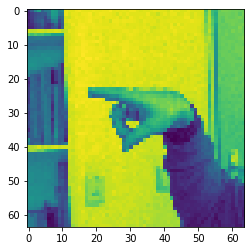

In [79]:
import cv2
cam = cv2.VideoCapture(0) #0=front-cam, 1=back-cam
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
x_max = 0
y_max = 0
x_min = 0
y_min = 0


# For webcam input:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                # If loading a video, use 'break' instead of 'continue'.
                continue
            h, w, c = image.shape
            # To improve performance, optionally mark the image as not writeable to
            # pass by reference.
            image.flags.writeable = False
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image)

            # Draw the hand annotations on the image.
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            imageclean = image.copy()
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    x_max = 0
                    y_max = 0
                    x_min = w
                    y_min = h

                    for lm in hand_landmarks.landmark:
                        x, y = int(lm.x * w), int(lm.y * h)

                        if x > x_max:
                            x_max = x
                        if x < x_min:
                            x_min = x
                        if y > y_max:
                            y_max = y
                        if y < y_min:
                            y_min = y
                   
                    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    
                    #mp_drawing.draw_landmarks(
                    #    image,
                    #    hand_landmarks,
                    #    mp_hands.HAND_CONNECTIONS,
                    #    mp_drawing_styles.get_default_hand_landmarks_style(),
                    #    mp_drawing_styles.get_default_hand_connections_style())
                    
                        
                        
            # Flip the image horizontally for a selfie-view display.
            cv2.imshow('Zwaaien met die handjes!', cv2.flip(image, 1))
            if cv2.waitKey(5) & 0xFF == 27:
                  break
cap.release()
cv2.destroyAllWindows()


margin = 100
cropped_image = imageclean[y_min-margin:y_max+margin, x_min-margin:x_max+margin]
cropped_image = cv2.flip(cropped_image, 1)
cropped_image = cropped_image.astype('float32')
cropped_image = cropped_image / 255
frame2 = cv2.resize(cropped_image, dsize=(64, 64), 
                 interpolation=cv2.INTER_CUBIC
                )
frame2 = np.mean(frame2, axis=2)
#plt.imshow(frame2)
frame2 = frame2.reshape(1,64,64,1)

results2 = model.predict(frame2)
# select the indix with the maximum probability
results2 = np.argmax(results2,axis = 1)

alphabet_string = ascii_lowercase
alphabet_list = list(alphabet_string)

plt.imshow(frame2[0])
#print(" predicted: " + str(results2))


#test = np.ndarray(shape=(1),dtype=np.int8)
#test[0] = np.argmax(tt[5000])

encoder.inverse_transform(results2)





<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Tijs\AppData\Local\Temp/ipykernel_30388/2409309054.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided


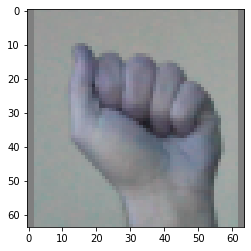

In [10]:
import cv2
import numpy as np

def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img





cropped_image = imageclean[y_min-margin:y_max+margin, x_min-margin:x_max+margin]


cropped_image = resizeAndPad(cropped_image, (64,64), 127)
plt.imshow(cropped_image)

IndexError: list index out of range

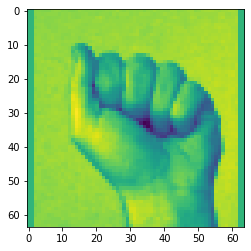

In [13]:
cropped_image = cv2.flip(cropped_image, 1)
cropped_image = cropped_image.astype('float32')
cropped_image = cropped_image / 255
frame2 = cv2.resize(cropped_image, dsize=(64, 64), 
                 interpolation=cv2.INTER_CUBIC
                )
frame2 = np.mean(frame2, axis=2)
plt.imshow(frame2)
frame2 = frame2.reshape(1,64,64,1)

results2 = model.predict(frame2)
# select the indix with the maximum probability
results2 = np.argmax(results2,axis = 1)

alphabet_string = ascii_lowercase
alphabet_list = list(alphabet_string)

plt.imshow(frame2[0])
print(" predicted: " + str(alphabet_list[int(results2)]))